In [1]:
#!pip install matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import bootstrap

In [2]:
df = pd.read_csv("/kaggle/input/final-emi/speeches_all_emi.csv")
df

/tmp/ipykernel_18/1876663219.py:1: DtypeWarning: Columns (7,8,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/final-emi/speeches_all_emi.csv")


,id,begin,end,text,date,session,electoralTerm,firstName,lastName,politicianId,...,intuition_mean,intuition_adj,evidence_z_sbert,intuition_z_sbert,evidence_minus_intuition_score_sbert,evidence_minus_intuition_score_w2v,intuition_similarity_w2v,intuition_z_w2v,evidence_similarity_w2v,evidence_z_w2v
0,1061078,221.0,327.0,33 Ergebni der Verloosung der Wahlakten an die...,1887-03-03,NaN,NaN,NaN,NaN,NaN,...,0.095646,-0.113175,0.079355,-1.307271,1.386626,-0.183530,-0.047310,1.560868,-0.082265,1.377338
1,1061102,347.0,456.0,Diskussion zur Geschäftsordnung betreffend die...,1887-03-03,NaN,NaN,NaN,NaN,NaN,...,0.095646,-0.099521,-1.724960,-1.149557,-0.575403,-0.701060,-0.072163,-1.401113,-0.117185,-2.102173
2,1061126,496.0,586.0,4 6 88 Staatssekretär des Innern Staatsministe...,1887-03-03,NaN,NaN,NaN,NaN,NaN,...,0.095646,0.077484,-0.210315,0.895005,-1.105320,-0.729011,-0.030143,3.606718,-0.067208,2.877707
3,1061198,706.0,831.0,1 6 77 von Kardorff 1 1 7 88 Feststellung der ...,1887-03-03,NaN,NaN,NaN,NaN,NaN,...,0.095646,-0.096976,-1.258589,-1.120150,-0.138440,-0.065285,-0.041756,2.222701,-0.074436,2.157416
4,1061234,890.0,982.0,Die Sitzung wird um 11 Uhr 35 Minuten durch de...,1887-03-03,NaN,NaN,NaN,NaN,NaN,...,0.095646,-0.112401,-1.691282,-1.298331,-0.392951,-1.147085,-0.054181,0.741935,-0.100154,-0.405151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165071,1060955,NaN,NaN,Gut ich beschränke mich auf einen Satz Ich pas...,2021-05-07,228.0,19.0,Helge,Lindh,11004802.0,...,0.149987,0.116347,0.018290,1.343911,-1.325621,0.152092,-0.065898,-0.376768,-0.101656,-0.224676
6165072,1060957,NaN,NaN,Vielen Dank Frau Präsidentin Liebe Kolleginnen...,2021-05-07,228.0,19.0,Tankred,Schipanski,11004143.0,...,0.160146,-0.041856,-1.122621,-0.483476,-0.639145,0.061185,-0.061233,0.181194,-0.097214,0.242379
6165073,1060957,NaN,NaN,von Meinungsfreiheit und Demokratie Philipp Am...,2021-05-07,228.0,19.0,Tankred,Schipanski,11004143.0,...,0.160146,0.080814,-0.718935,0.933467,-1.652401,0.480652,-0.064889,-0.254452,-0.097377,0.226199
6165074,1060957,NaN,NaN,beides ist ausbaufähig die Beispiele von Anke ...,2021-05-07,228.0,19.0,Tankred,Schipanski,11004143.0,...,0.160146,-0.056210,-1.090478,-0.649276,-0.441201,0.429704,-0.067214,-0.531555,-0.100669,-0.101851


In [3]:
# Adjust the date column to ensure it is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year


In [4]:
df.columns

Index(['id', 'begin', 'end', 'text', 'date', 'session', 'electoralTerm',
       'firstName', 'lastName', 'politicianId', 'factionId', 'documentUrl',
       'positionShort', 'positionLong', 'length', 'tokens_top100',
       'fraction_top100', 'chunk_length', 'evidence_similarity_sbert',
       'intuition_similarity_sbert', 'chunk_length_bin', 'evidence_mean',
       'evidence_adj', 'intuition_mean', 'intuition_adj', 'evidence_z_sbert',
       'intuition_z_sbert', 'evidence_minus_intuition_score_sbert',
       'evidence_minus_intuition_score_w2v', 'intuition_similarity_w2v',
       'intuition_z_w2v', 'evidence_similarity_w2v', 'evidence_z_w2v', 'year'],
      dtype='object')

In [5]:
def plot_with_confidence_intervals(df, x, y, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=x, y=y, errorbar=('ci', 95))
    plt.title(title)
    plt.savefig(y)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


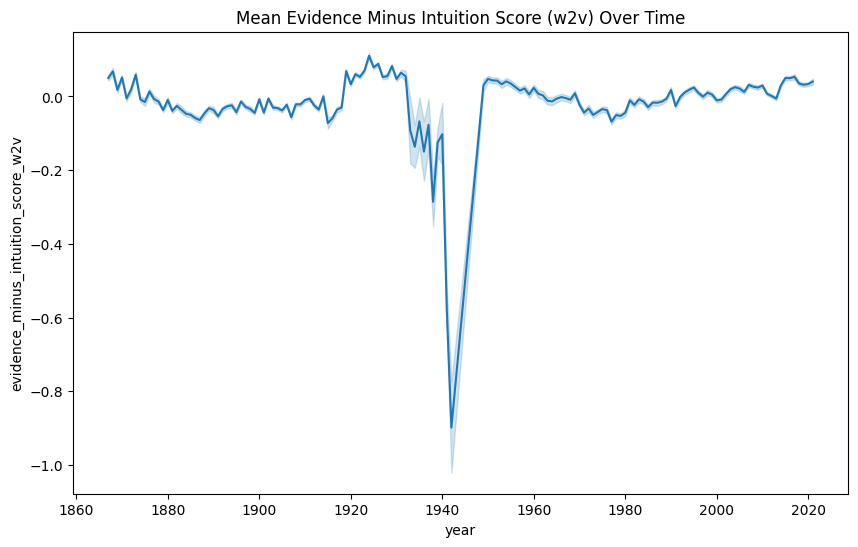

In [6]:
# 1. Plot mean evidence_minus_intuition score for w2v with confidence intervals over time (per year)
plot_with_confidence_intervals(df, 'year', 'evidence_minus_intuition_score_w2v', 'Mean Evidence Minus Intuition Score (w2v) Over Time')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


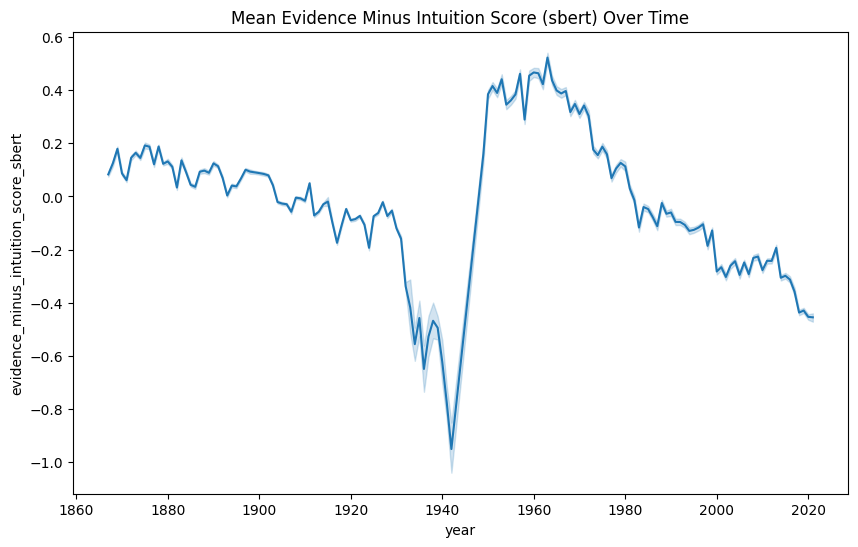

In [7]:
# 2. Plot mean evidence_minus_intuition score for sbert with confidence intervals over time (per year)
plot_with_confidence_intervals(df, 'year', 'evidence_minus_intuition_score_sbert', 'Mean Evidence Minus Intuition Score (sbert) Over Time')



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

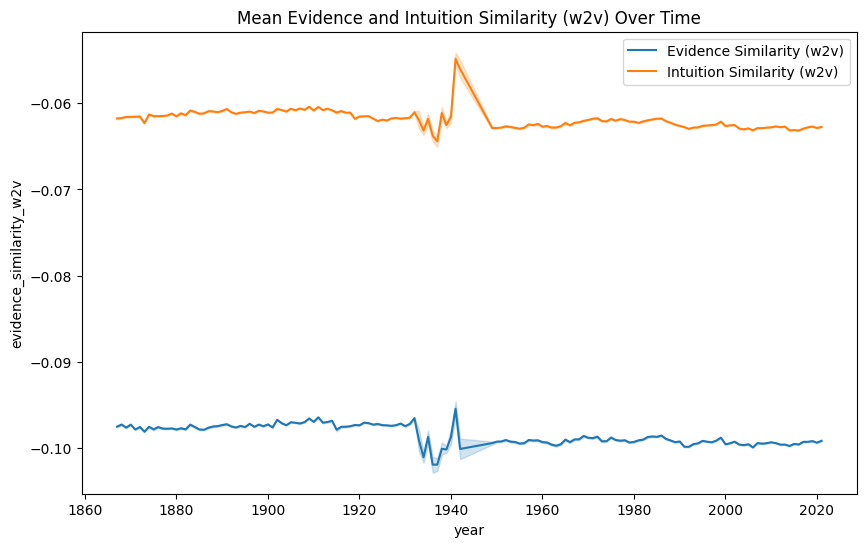

In [8]:
# 3. Plot mean evidence and intuition similarity in one plot with confidence intervals for w2v
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='evidence_similarity_w2v', errorbar=('ci', 95), label='Evidence Similarity (w2v)')
sns.lineplot(data=df, x='year', y='intuition_similarity_w2v', errorbar=('ci', 95), label='Intuition Similarity (w2v)')
plt.title('Mean Evidence and Intuition Similarity (w2v) Over Time')
plt.legend()
plt.savefig("similarities_w2v.png")
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

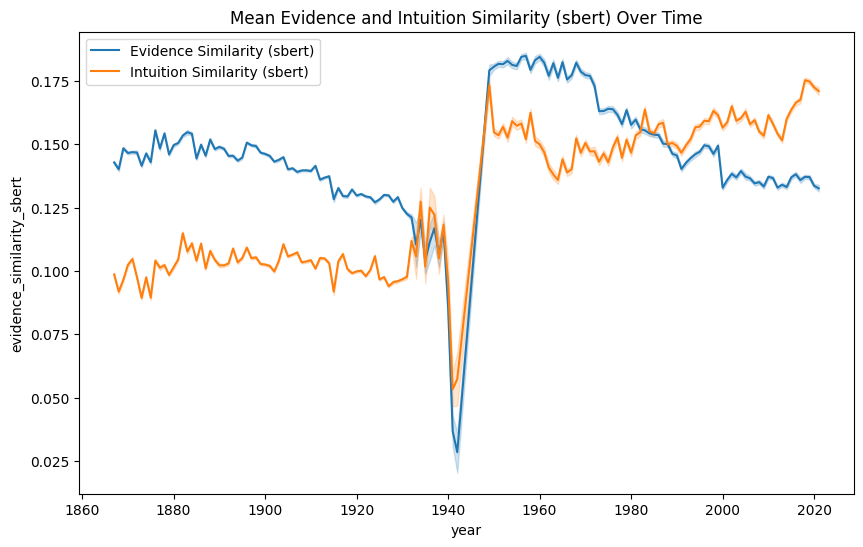

In [9]:
# 4. Plot mean evidence and intuition similarity in one plot with confidence intervals for sbert
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='evidence_similarity_sbert', errorbar=('ci', 95), label='Evidence Similarity (sbert)')
sns.lineplot(data=df, x='year', y='intuition_similarity_sbert', errorbar=('ci', 95), label='Intuition Similarity (sbert)')
plt.title('Mean Evidence and Intuition Similarity (sbert) Over Time')
plt.legend()
plt.savefig("similarities_sbert.png")
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

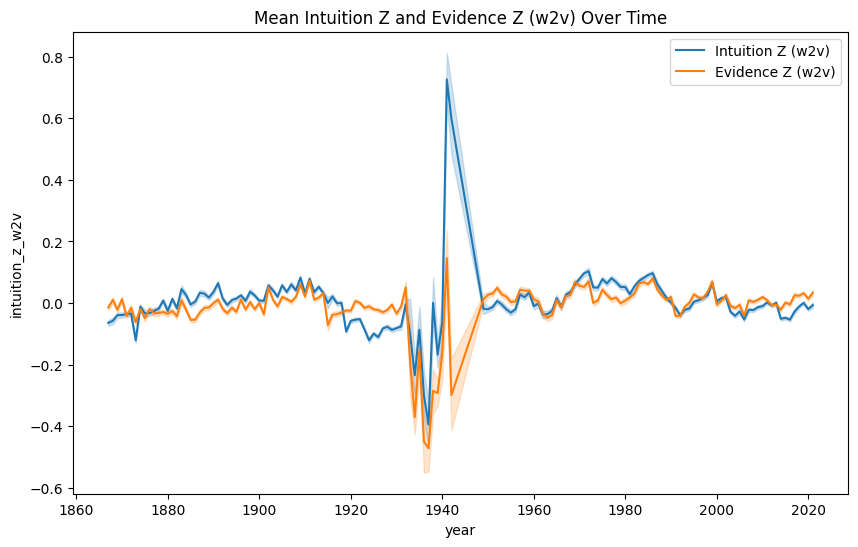

In [10]:
# 5. Plot mean intuition z and evidence z over time with confidence intervals for w2v
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='intuition_z_w2v', errorbar=('ci', 95), label='Intuition Z (w2v)')
sns.lineplot(data=df, x='year', y='evidence_z_w2v', errorbar=('ci', 95), label='Evidence Z (w2v)')
plt.title('Mean Intuition Z and Evidence Z (w2v) Over Time')
plt.legend()
plt.savefig("z_w2v.png")
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

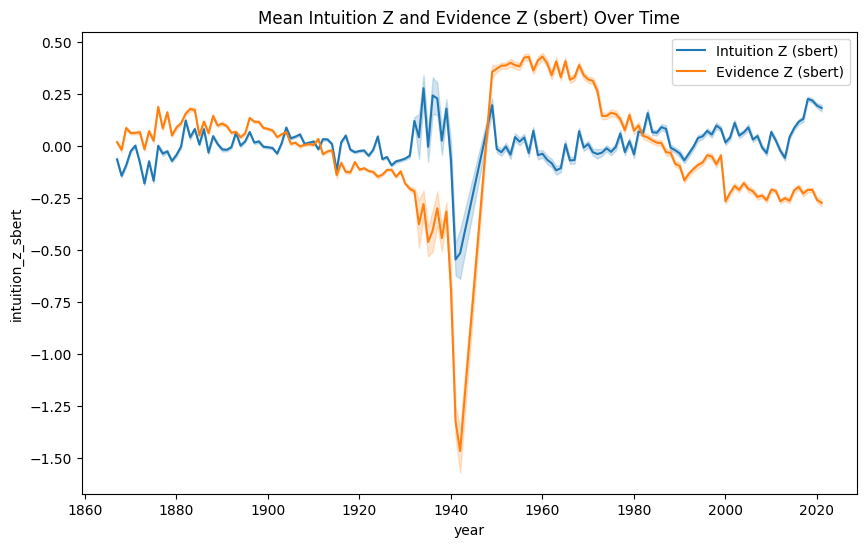

In [11]:
# 6. Plot mean intuition z and evidence z over time with confidence intervals for sbert
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='intuition_z_sbert', errorbar=('ci', 95), label='Intuition Z (sbert)')
sns.lineplot(data=df, x='year', y='evidence_z_sbert', errorbar=('ci', 95), label='Evidence Z (sbert)')
plt.title('Mean Intuition Z and Evidence Z (sbert) Over Time')
plt.legend()
plt.savefig("z_sbert.png")
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

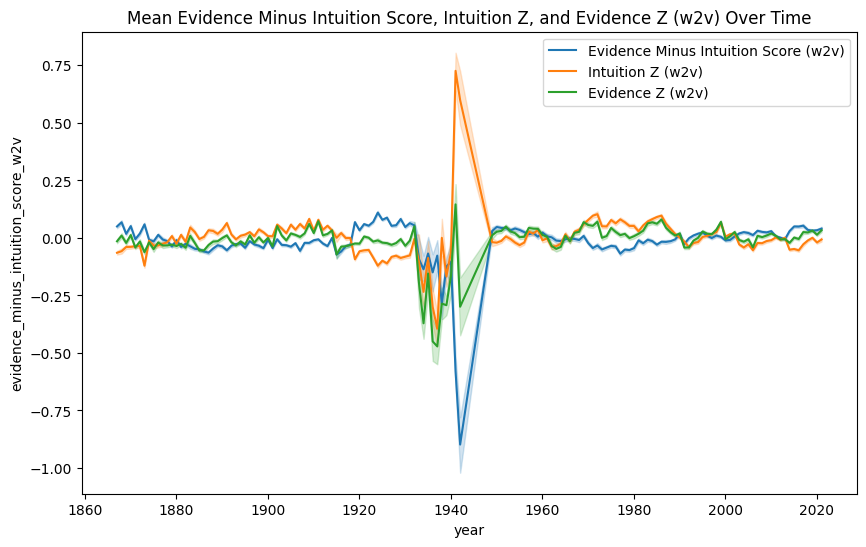

In [12]:
# 7. Plot 1 and 5 together in one plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='evidence_minus_intuition_score_w2v', errorbar=('ci', 95), label='Evidence Minus Intuition Score (w2v)')
sns.lineplot(data=df, x='year', y='intuition_z_w2v', errorbar=('ci', 95), label='Intuition Z (w2v)')
sns.lineplot(data=df, x='year', y='evidence_z_w2v', errorbar=('ci', 95), label='Evidence Z (w2v)')
plt.title('Mean Evidence Minus Intuition Score, Intuition Z, and Evidence Z (w2v) Over Time')
plt.legend()
plt.savefig("all_w2v.png")
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

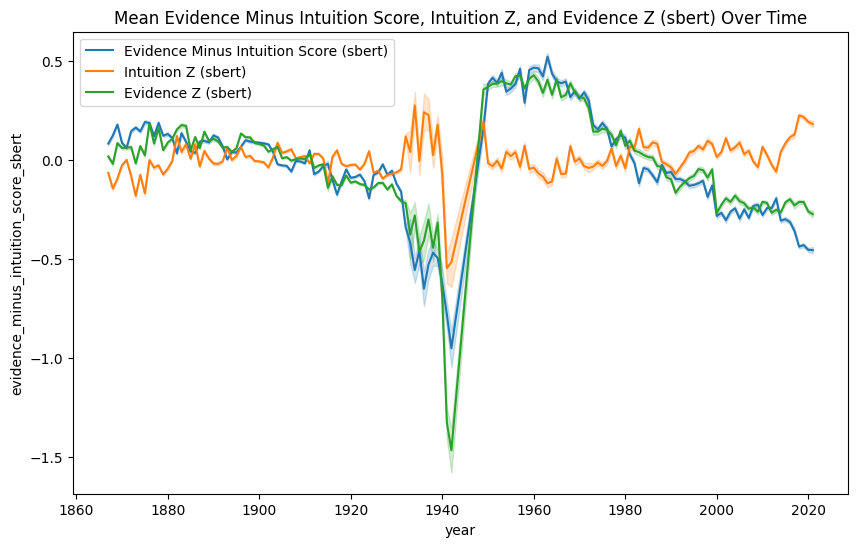

In [13]:
# 8. Plot 2 and 6 together in one plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='evidence_minus_intuition_score_sbert', errorbar=('ci', 95), label='Evidence Minus Intuition Score (sbert)')
sns.lineplot(data=df, x='year', y='intuition_z_sbert', errorbar=('ci', 95), label='Intuition Z (sbert)')
sns.lineplot(data=df, x='year', y='evidence_z_sbert', errorbar=('ci', 95), label='Evidence Z (sbert)')
plt.title('Mean Evidence Minus Intuition Score, Intuition Z, and Evidence Z (sbert) Over Time')
plt.legend()
plt.savefig("all_sbert.png")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


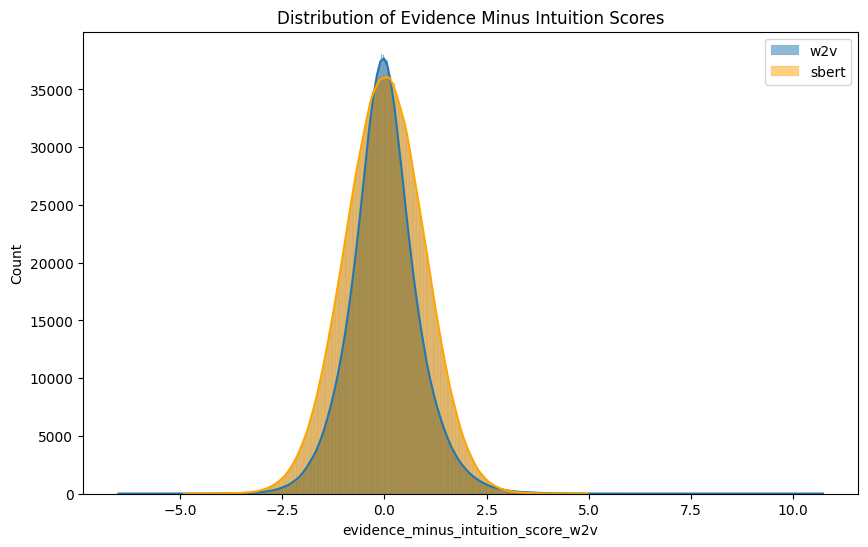

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


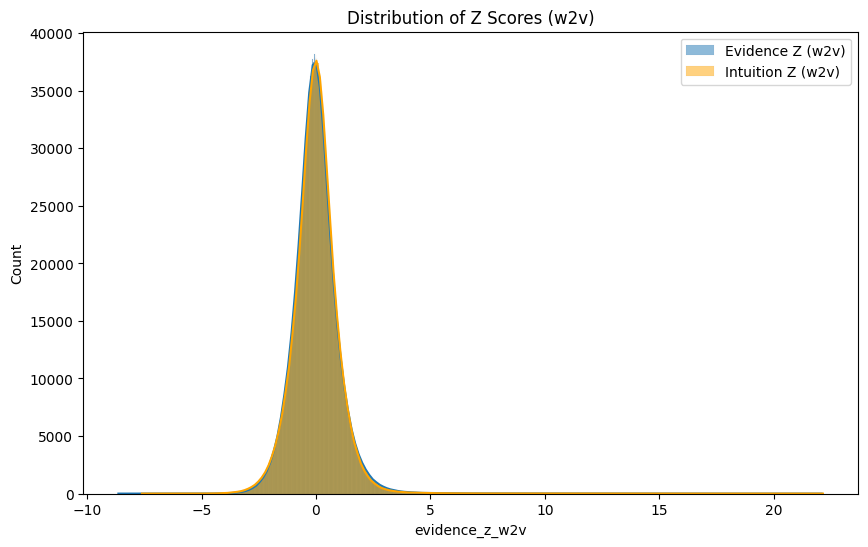

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


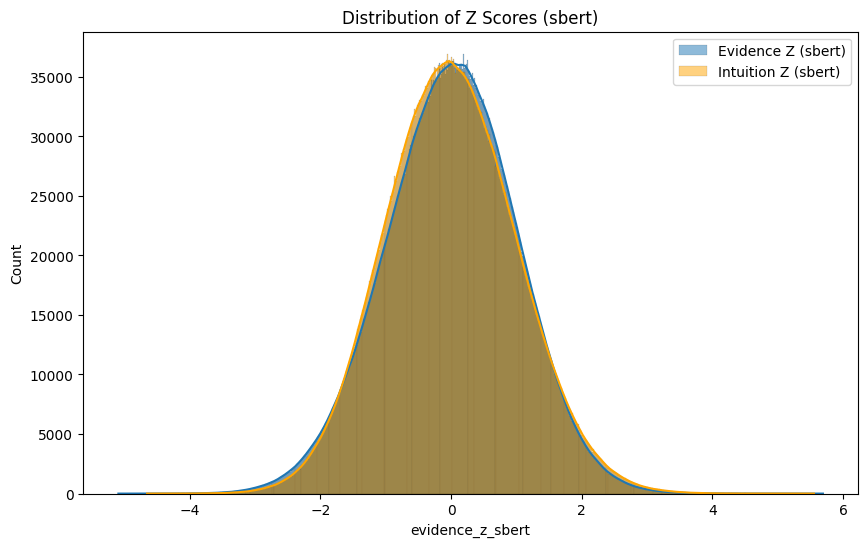

In [14]:
# Plot distributions for the evidence minus intuition scores
plt.figure(figsize=(10, 6))
sns.histplot(df['evidence_minus_intuition_score_w2v'], kde=True, label='w2v')
sns.histplot(df['evidence_minus_intuition_score_sbert'], kde=True, color='orange', label='sbert')
plt.title('Distribution of Evidence Minus Intuition Scores')
plt.legend()
plt.savefig("emi_distributions.png")
plt.show()

# Plot distributions for the z scores for w2v
plt.figure(figsize=(10, 6))
sns.histplot(df['evidence_z_w2v'], kde=True, label='Evidence Z (w2v)')
sns.histplot(df['intuition_z_w2v'], kde=True, color='orange', label='Intuition Z (w2v)')
plt.title('Distribution of Z Scores (w2v)')
plt.legend()
plt.savefig("z_distribution_w2v.png")
plt.show()

# Plot distributions for the z scores for sbert
plt.figure(figsize=(10, 6))
sns.histplot(df['evidence_z_sbert'], kde=True, label='Evidence Z (sbert)')
sns.histplot(df['intuition_z_sbert'], kde=True, color='orange', label='Intuition Z (sbert)')
plt.title('Distribution of Z Scores (sbert)')
plt.legend()
plt.savefig("z_distribution_sbert.png")
plt.show()

In [15]:
# 1. Calculate the correlation of evidence_minus_intuition score between w2v and sbert
correlation_evidence_minus_intuition = df['evidence_minus_intuition_score_w2v'].corr(df['evidence_minus_intuition_score_sbert'])

print(correlation_evidence_minus_intuition)

0.06819955474839982


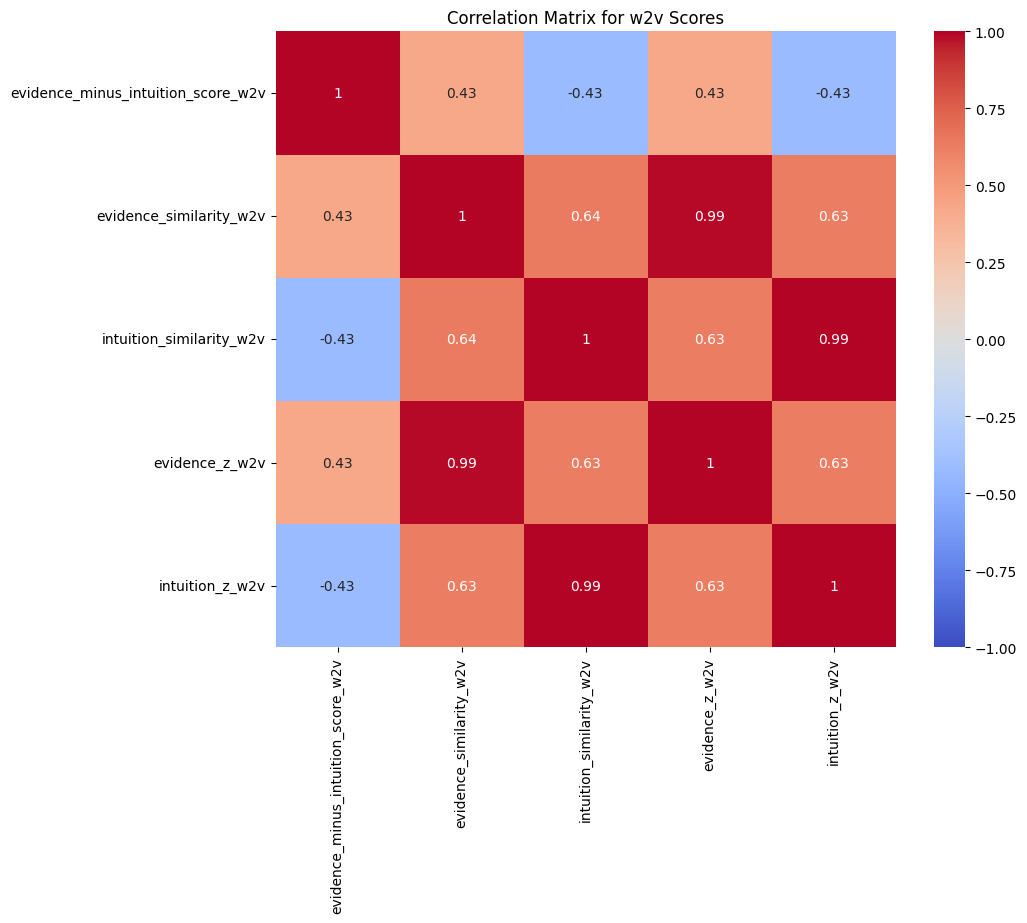

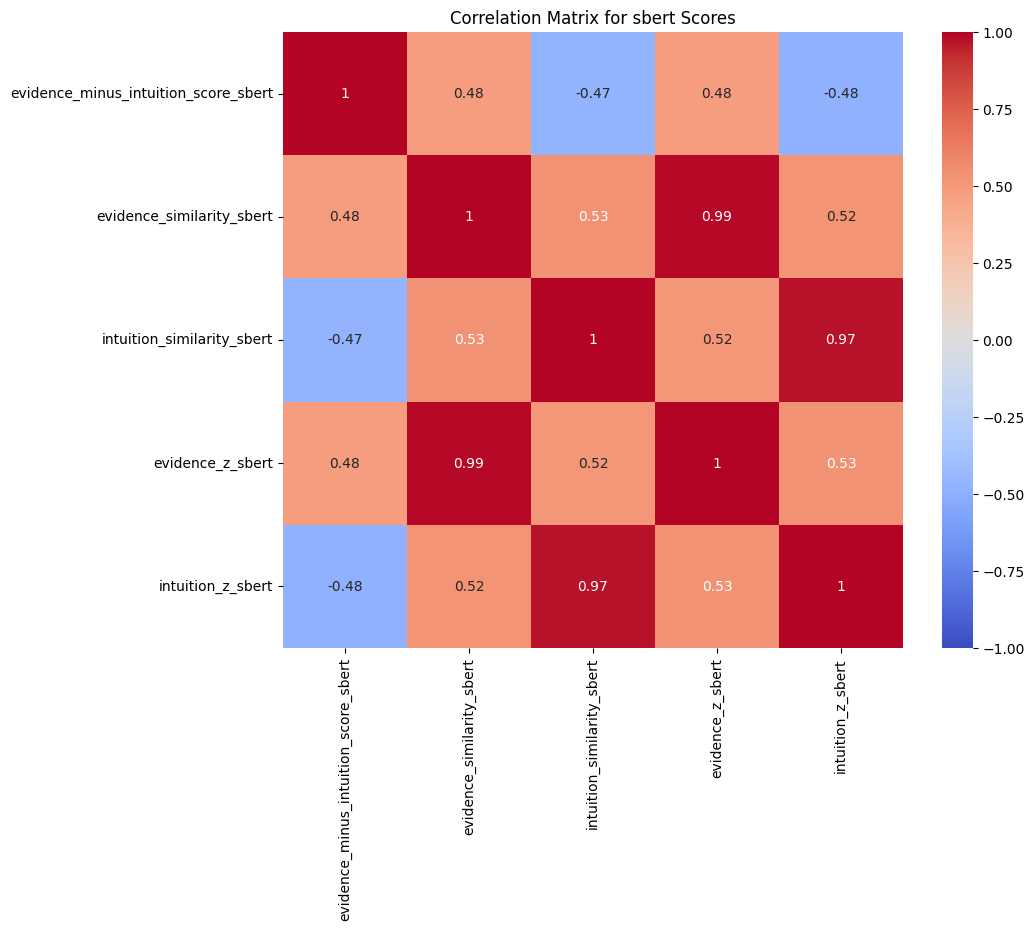

In [16]:
# 2. Create correlation matrices for each model's scores
correlation_matrix_w2v = df[['evidence_minus_intuition_score_w2v', 'evidence_similarity_w2v', 'intuition_similarity_w2v', 'evidence_z_w2v', 'intuition_z_w2v']].corr()
correlation_matrix_sbert = df[['evidence_minus_intuition_score_sbert', 'evidence_similarity_sbert', 'intuition_similarity_sbert', 'evidence_z_sbert', 'intuition_z_sbert']].corr()

# Plotting the correlation matrix for w2v as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_w2v, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for w2v Scores')
plt.savefig("correlations_w2v.png")
plt.show()

# Plotting the correlation matrix for sbert as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sbert, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for sbert Scores')
plt.savefig("correlations_sbert.png")
plt.show()

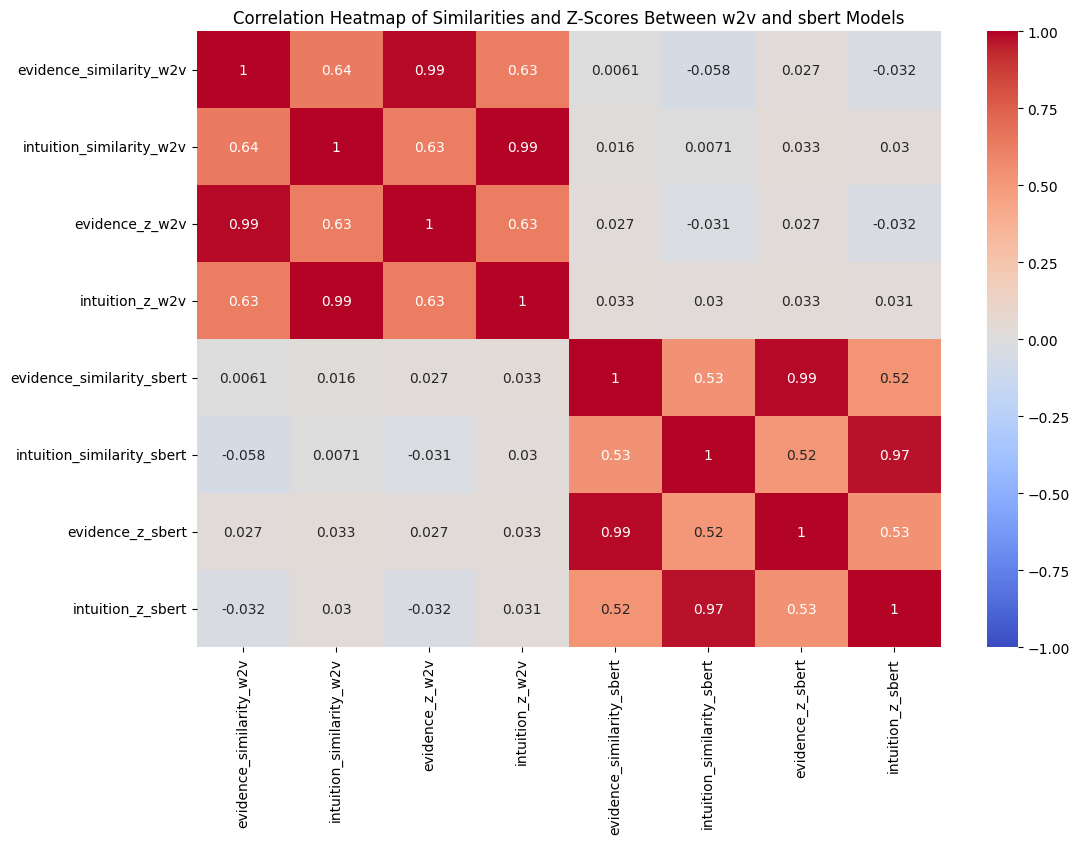

In [17]:
#Create a DataFrame with the relevant columns for correlation analysis
correlation_data = df[['evidence_similarity_w2v', 'intuition_similarity_w2v', 'evidence_z_w2v', 'intuition_z_w2v',
                       'evidence_similarity_sbert', 'intuition_similarity_sbert', 'evidence_z_sbert', 'intuition_z_sbert']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Similarities and Z-Scores Between w2v and sbert Models')
plt.savefig("correlations_all.png")
plt.show()